<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Visión por Computadora</center></span>
## <span style="color:red"><center>Estimación de Poses</center></span>

##   <span style="color:blue">Profesores</span>

### Coordinador


- Campo Elías Pardo Turriago, cepardot@unal.edu.co 

### Conferencistas


- Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
- Daniel  Montenegro, Msc, dextronomo@gmail.com 
- Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

## <span style="color:blue">Asesora Medios y Marketing digital</span>

- Maria del Pilar Montenegro, pmontenegro88@gmail.com 



## <span style="color:blue">Asistentes</span>



- Nayibe Yesenia Arias, naariasc@unal.edu.co
- Venus Celeste Puertas, vpuertasg@unal.edu.co 

## <span style="color:blue">Introducción</span>

Dentro del contexto de la detección de objetos, a pesar de lo sorprendente que es poder detectar múltiples objetos de diferentes clases, esta aplicación no va a ser lo que busquemos al final. Además de los modelos más generalizados, observaremos trabajos más especializados y, al mismo tiempo, que buscan información más allá del simple cuadro. La estimación de poses es uno de estos



## <span style="color:blue">De un cuadro a un cuerpo</span>

<figure>
<center>
<img src="../Imagenes/poses.png" width="663" height="330" align="center"/> 
</center>
</figure>

Definiremos la estimación de poses como cualquier método para hacer una descripción del cuerpo humano y sus extremidades con detalle. Esto se logra a partir de la detección y tracción de "puntos clave semánticos" en el cuerpo. Cosas como los hombros, piernas, ojos, nariz, etc. Si esto se les hace símilar, es porque hemos visto casos parecidos en la detección de [rostros](../Cuadernos/rostros_cnn.ipynb).  

Podemos separar los problemas de la detección de objetos en dos métodos:

- **Abajo hacia Arriba**: Se estiman las extremidades para luego conectarlas en una única pose.
- **Arriba hacia Abajo**: Se hace primero una detección de personas para luego estimar las poses dentro de de las cajas delimitantes. 

De igual forma, podemos separar los modelos en los datos de salida

- **Modelo kinemático**: o modelo de esqueleto. Se predicen los puntos puntos clave y su conexión entre estos. Se usa para estimaciones en 2 y 3 dimensiones, pero no permite obtener información sobre la textura o la forma de los cuerpos
- **Modelo de Plano**: En el caso 2D, se usa este modelo para predecir la apariencia y la forma del cuerpo completo. En muchos casos, esto se logra representando el cuerpo como un conjunto de rectángulos que luego permite el dibujar una silueta alrededor de estos
- **Modelo volumétrico**: Modelos para hacer la representación en 3 dimensiones del cuerpo y sus detalles completos

<figure>
<center>
<img src="../Imagenes/pose-models.png" width="840" height="628" align="center"/> 
</center>
</figure>

Por su flexibilidad, los modelos kinemáticos son los más utilizados. Y aquí no será la excepción

## <span style="color:blue">Aplicaciones</span>

Los usos de estas tecnologías vienen de casos médicos, hasta para la industria del entretenimiento

### <span style="color:blue">Detección de poses para atletas</span>

En el deporte, la postura es una parte importante para la salud y, en la mayoría de casos, tener un mejor desempeño. Con la estimación de poses, es posible mejorar el entrenamiento de una forma más detallada.

<figure>
<center>
<img src="../Imagenes/athlete-pose.gif" width="480" height="480" align="center"/> 
</center>
</figure>

Una extensión de esta aplicación serían los asistentes de entrenamiento personales. 

### <span style="color:blue">Captura de movimientos y realidad aumentada</span>

Actualmente, en el cine y juegos, se utilizan tecnologías para transformar movimientos de humanos reales al de esqueletos hechos por computadora

<figure>
<center>
<img src="../Imagenes/mocap.gif" width="480" height="259" align="center"/> 
</center>
</figure>

El problema yace en lo complejas y costosas que son estas tecnologías, permitiendo que solo los de mayor recursos puedan conseguirlas y usarlas. Usando estimación de poses, sería posible que más personas puedan utilizarlas en proyectos más modestos.

De igual forma. Gracias a la detección de poses, sería posible agregar efectos generados por computadora sin necesidad de los conocidos "trajes verdes", o cosas más sencillas como los filtros del teléfono

<figure>
<center>
<img src="../Imagenes/gotg.jpg" width="320" height="320" align="center"/> 
</center>
</figure>

### <span style="color:blue">Tracción de movimiento en videojuegos</span>

Se han tenido esfuerzos de aplicar la estimación de poses en el campo de los juegos. El más interesante fue el kinect.

<figure>
<center>
<img src="../Imagenes/kinect.gif" width="636" height="358" align="center"/> 
</center>
</figure>

Habiendo visto qué podemos hacer, hablaremos del cómo

## <span style="color:blue">Mask R-CNN</span>

A pesar de la existencia de YOLO, todavía se buscó cómo mejorar y aprovechar las ideas encontradas en los modelos convolucionales por regiones. A partir de Faster R-CNN, se cambiaron ciertos aspectos de la arquitectura para atacar un problema "ligeramente" diferente a la detección de objetos: La Segmentación por instancias. Un paso importante para la estimación de poses moderna. Ahora, después de calcular la caja delimitante, hacemos una inferencia sobre la silueta de las clases que estamos encontrando

<figure>
<center>
<img src="../Imagenes/instance-segmentation.png" width="794" height="353" align="center"/> 
</center>
</figure>



Después de la creación de [Faster R-CNN](../Cuadernos/deteccion_objetos_rcnn.ipynb), se acopló la red de tal forma que aplique segmentación por instancia:

- Agregando a las salidas originales (clasificador y regresión de cajas), se agrega una tercera rama: **Enmascaramiento binario** sobre cada clase. La red que procesa estas mascaras es una red completamente convolucional [al igual de DCGAN](../Cuadernos/DCGAN.ipynb)

<figure>
<center>
<img src="../Imagenes/binary-mask.jpg"  align="center"/> 
</center>
</figure>

- Además, en lugar del ROI Pooling, se usa **ROI Align**: a partir de interpolación binomial, resumimos los valores de la imagen a partir de celdas del mismo tamaño

<figure>
<center>
<img src="../Imagenes/roi-align.png" width="580" height="389" align="center"/> 
</center>
</figure>

Así obtenemos la estructura final

<figure>
<center>
<img src="../Imagenes/mask-rcnn.png" align="center"/> 
</center>
</figure>

Pero este no es el fin del trabajo. Tenemos que transformar la segmentación de instancia a la estimación de poses.

En el caso clásico, la salida de esta red es un enmascaramiento completo de la imagen con su respectiva clase, siendo estas distintos objetos o seres. 

<figure>
<center>
<img src="../Imagenes/mask.png" width="500" height="300" align="center"/> 
</center>
</figure>

Si queremos encontrar poses, nuestras nuevas clases serán los puntos clave, y cada uno de estos recibirá su propio escalamiento

<figure>
<center>
<img src="../Imagenes/keypoints.png" width="500" height="300" align="center"/> 
</center>
</figure>

En este caso del modelo kinemático, que sigue el dataset COCO, contamos con 17 puntos clave: ojos, nariz, orejas, hombros, codos, muñecas, caderas, rodillas y tobillos. Estos tienen un orden específico

Comenzaremos ahora construyendo el modelo al que le demos la imagen y nos calcará el esqueleto

In [1]:
import torchvision
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True)
model.eval()

Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth" to /home/thejarmanitor/.cache/torch/hub/checkpoints/keypointrcnn_resnet50_fpn_coco-fc266e95.pth


  0%|          | 0.00/226M [00:00<?, ?B/s]

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

Definimos una lista de puntos clave, junto con sus conexiones entre estas

In [4]:
keypoints = ['nariz','ojo_izq','ojo_der','oreja_izq','oreja_der','hombro_izq','hombro_der','codo_izq','codo_der',
             'muñeca_izq','muñeca_der','cadera_izq','cadera_der','rodilla_izq', 'rodilla_der', 'tobillo_izq','tobillo_der']

def get_limbs_from_keypoints(keypoints):
    limbs = [       
        [keypoints.index('ojo_der'), keypoints.index('nariz')],
        [keypoints.index('ojo_der'), keypoints.index('oreja_der')],
        [keypoints.index('ojo_izq'), keypoints.index('nariz')],
        [keypoints.index('ojo_izq'), keypoints.index('oreja_izq')],
        [keypoints.index('hombro_der'), keypoints.index('codo_der')],
        [keypoints.index('codo_der'), keypoints.index('muñeca_der')],
        [keypoints.index('hombro_izq'), keypoints.index('codo_izq')],
        [keypoints.index('codo_izq'), keypoints.index('muñeca_izq')],
        [keypoints.index('cadera_der'), keypoints.index('rodilla_der')],
        [keypoints.index('rodilla_der'), keypoints.index('tobillo_der')],
        [keypoints.index('cadera_izq'), keypoints.index('rodilla_izq')],
        [keypoints.index('rodilla_izq'), keypoints.index('tobillo_izq')],
        [keypoints.index('hombro_der'), keypoints.index('hombro_izq')],
        [keypoints.index('cadera_der'), keypoints.index('cadera_izq')],
        [keypoints.index('hombro_der'), keypoints.index('cadera_der')],
        [keypoints.index('hombro_izq'), keypoints.index('cadera_izq')]
        ]
    return limbs


limbs = get_limbs_from_keypoints(keypoints)

In [33]:
from torchvision import transforms as T

img_path = "../Imagenes/einstein.jpg"
img = cv2.imread(img_path)

transform = T.Compose([T.ToTensor()])
img_tensor = transform(img)

# pasamos la imagen por el modelo
# la entrada es una lista, así que una salida también es una lista
output = model([img_tensor])[0]

print(output.keys())

dict_keys(['boxes', 'labels', 'scores', 'keypoints', 'keypoints_scores'])


In [34]:
def draw_keypoints_per_person(img, all_keypoints, all_scores, confs, keypoint_threshold=2, conf_threshold=0.9):
    # inicializamos un conjunto de colores del espectro arcoiris
    cmap = plt.get_cmap('rainbow')
    # creamos copia de la imagen
    img_copy = img.copy()
    # elegimos un conjunto de N ids de colores del espectro
    color_id = np.arange(1,255, 255//len(all_keypoints)).tolist()[::-1]
    # iteramos sobre cada persona detectada
    for person_id in range(len(all_keypoints)):
      # revisamos el nivel de confianza de las personas detectadas
      if confs[person_id]>conf_threshold:
        # tomamos las posiciones de los puntos clave de cada persona detectada
        keypoints = all_keypoints[person_id, ...]
        # tomamos los puntajes de los puntos clave
        scores = all_scores[person_id, ...]
        # iteramos sobre cada puntaje
        for kp in range(len(scores)):
            # revisamos la confianza de cada punto
            if scores[kp]>keypoint_threshold:
                # convertimos el array de puntos flotantes a una lista de enteros
                keypoint = tuple(map(int, keypoints[kp, :2].detach().numpy().tolist()))
                # elegimos el color del id especificado
                color = tuple(np.asarray(cmap(color_id[person_id])[:-1])*255)
                #dibujamos un circulo en la posición
                cv2.circle(img_copy, keypoint, 30, color, -1)

    return img_copy

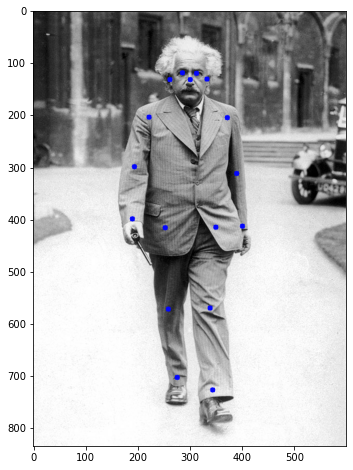

In [35]:
keypoints_img = draw_keypoints_per_person(img, output["keypoints"], output["keypoints_scores"], output["scores"],keypoint_threshold=2)

plt.figure(figsize=(8, 8))
plt.imshow(keypoints_img[:, :, ::-1])
plt.show()

In [36]:
def draw_skeleton_per_person(img, all_keypoints, all_scores, confs, keypoint_threshold=2, conf_threshold=0.9):
    
    cmap = plt.get_cmap('rainbow')
    img_copy = img.copy()
    if len(output["keypoints"])>0:
      colors = np.arange(1,255, 255//len(all_keypoints)).tolist()[::-1]
      for person_id in range(len(all_keypoints)):
          if confs[person_id]>conf_threshold:
            keypoints = all_keypoints[person_id, ...]

            # iteramos sobre cada extremidad
            for limb_id in range(len(limbs)):
              # elegimos el inicio de la extremidad
              limb_loc1 = keypoints[limbs[limb_id][0], :2].detach().numpy().astype(np.int32)
              # elegimos el final de la extremidad
              limb_loc2 = keypoints[limbs[limb_id][1], :2].detach().numpy().astype(np.int32)
              #consideramos la confianza de la extremidad como el puntaje mínimo de los dos puntos
              limb_score = min(all_scores[person_id, limbs[limb_id][0]], all_scores[person_id, limbs[limb_id][1]])
              # revisamos si el valor está encima del limitante
              if limb_score> keypoint_threshold:
                color = tuple(np.asarray(cmap(colors[person_id])[:-1])*255)
                # dibujamos la lina de la extremidad
                cv2.line(img_copy, tuple(limb_loc1), tuple(limb_loc2), color, 2)

    return img_copy

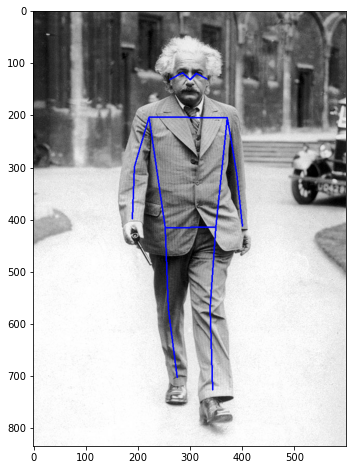

In [37]:
skeleton_img = draw_skeleton_per_person(img, output["keypoints"], output["keypoints_scores"], output["scores"],keypoint_threshold=2)

plt.figure(figsize=(8, 8))
plt.imshow(skeleton_img[:, :, ::-1])
plt.show()

In [ ]:
skeleton_img = draw_skeleton_per_person(img, output["keypoints"], output["keypoints_scores"], output["scores"],keypoint_threshold=2)

cv2.imwrite("output/skeleton-img.jpg", skeleton_img)

plt.figure(figsize=(8, 8))
plt.imshow(skeleton_img[:, :, ::-1])
plt.show()

In [42]:
img_path = "../Imagenes/kick.jpg"
img = cv2.imread(img_path)

transform = T.Compose([T.ToTensor()])
img_tensor = transform(img)

output = model([img_tensor])[0]

print(output.keys())

dict_keys(['boxes', 'labels', 'scores', 'keypoints', 'keypoints_scores'])


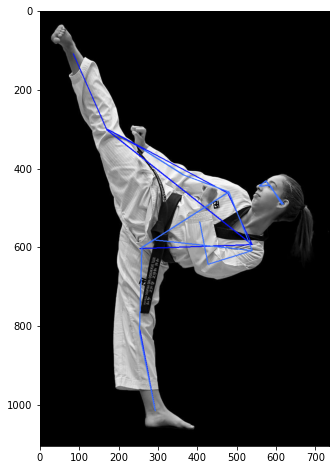

In [43]:
skeleton_img = draw_skeleton_per_person(img, output["keypoints"], output["keypoints_scores"], output["scores"],keypoint_threshold=2)

plt.figure(figsize=(8, 8))
plt.imshow(skeleton_img[:, :, ::-1])
plt.show()